# Association Rule Mining (ARM)

## Introduction

The feature data 'X' for this portion of the analysis consists of text data collected from news articles via the News API. The goal of this analysis is to determine if there are any connections or linkages between different words or phrases when it comes to electric vehicles. Sentiment analysis on the articles is also performed to discern how the media outlets portray these automobile advancements. 

Ultimately, I aim to analyze if there are identifiable connections in narrative patterns or sentiment trends. Furthermore, using association rule mining to investigate any correlations amongst certain terms and what they might mean in the given context of the EV industry. 

# Theory

The Association Rule Mining method sifts through large datasets to discover hidden relationships between different items. As a unsupervised machine learning technique, ARM doesn't require pre-labeled data to learn from. Instead, it identifies items that frequently occur together, revealing patterns that might not be immediately obvious. For example, in a textual analysis, certain words might consistently appear close to one another, suggesting a connection in context or usage. The presence of one word can significantly increase the likelihood of the other's occurrence, a relationship that ARM can quantify to predict associations and trends.

The ARM method not only identifies if two items are associated, it can also discern the strength of their association. For example, if the words "electric vehicle" and "sustainability" appear together quite frequently in articles, then ARM can help identify how often this pattern is observed. This quantifies the insights gained from the broader public discussions around EVs. Leaders and executives can make well-informed decisions by understanding these patterns and what may be causing them in order to bring changes as necessary.

This may be beneficial information to marketing teams as they can allocate resources to steer their campaigns towards the direction where it may gain the most traction. ARM is a valuable tool in understanding patterns that exist in data that allows us access to detailed insights into trends that we may have been previously unaware of. It provides a closer look into customer behavior and public opinion which is invaluable for business growth. 

# Methods

## Import

Load the necessary packages and libraries offered by python to facilitate the NLP and ARM process

In [123]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

import os
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

## Read and clean articles

In [124]:
# User parameters
input_path = '../eda/description.txt'
compute_sentiment = True
sentiment = []  # Average sentiment of each chunk of text
ave_window_size = 5 # Size of scanning window for moving average

# Output file
output = 'transactions.txt'
if os.path.exists(output): os.remove(output)

# Initialize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
sia = SentimentIntensityAnalyzer()

# Add more stopwords
stopwords = stopwords.words('english')
add = ['mr', 'mrs', 'wa', 'dr', 'said', 'back', 'could', 'one', 'looked', 'like', 'know', 'around', 'dont', 'a', 'the', 'is', 'are']
stopwords.extend(add)

def read_and_clean(path, START=0, STOP=None):
    global sentiment

    with open(path) as file:
        text = file.read()

    #REMOVE HEADER, AND NEW LINES
    text = text.replace("'", "")  # wasn't --> wasnt
    lines = text.splitlines()
    lines = lines[START:STOP] if STOP else lines[START:]
    text = ' '.join(lines)

    text = ''.join(filter(lambda x: x in string.printable, text))

    sentences = nltk.tokenize.sent_tokenize(text)
    print("NUMBER OF SENTENCES FOUND:", len(sentences))

    #CLEAN AND LEMMATIZE
    keep = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    new_sentences = []
    vocabulary = []

    for sentence in sentences:
        new_sentence = ''
        words = nltk.word_tokenize(sentence)

        for word in words:
            word = word.lower()  # Convert to lowercase first
            word = ''.join(char for char in word if char in keep)
            new_word = lemmatizer.lemmatize(word)

            if new_word not in stopwords and len(new_word) > 0:
                new_sentence += ',' + new_word if new_sentence else new_word
                if new_word not in vocabulary:
                    vocabulary.append(new_word)

        new_sentences.append(new_sentence.split(","))

        if compute_sentiment:
            sentiment_scores = sia.polarity_scores(sentence)
            sentiment.append((sentiment_scores['pos'], sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['compound']))

        if len(new_sentence.split(',')) > 2:
            with open(output, "a") as f:
                f.write(new_sentence + "\n")

    sentiment = np.array(sentiment)
    if sentiment.size > 0:
        print("TOTAL AVERAGE SENTIMENT:", np.mean(sentiment, axis=0))
    else:
        print("TOTAL AVERAGE SENTIMENT: No sentiment data available")
    print("VOCAB LENGTH", len(vocabulary))
    return new_sentences

transactions = read_and_clean(input_path)
print(transactions[:5])


NUMBER OF SENTENCES FOUND: 99
TOTAL AVERAGE SENTIMENT: [0.10641414 0.02876768 0.86480808 0.3293798 ]
VOCAB LENGTH 1089
[['ahead', 'sixthgeneration', 'honda', 'crvs', 'malaysian', 'launch', 'expected', 'later', 'month', 'honda', 'malaysia', 'ha', 'previewing', 'suv', 'via', 'series', 'customer', 'showcase', 'selected', 'dealership', 'across', 'country'], ['preview', 'post', '2024', 'honda', 'cr', 'bn'], ['frank', 'recently', 'reported', 'electric', 'vehicle', 'ev', 'sale', 'way', 'u', 'vehicle', 'continue', 'city', 'unveils', 'section', 'road', 'allows', 'ev', 'driver', 'wirelessly', 'charge', 'vehicle', 'drive', 'lcnb', 'corp', 'decreased', 'holding', 'tesla', 'inc', 'nasdaq', 'tsla', 'free', 'report', '176', 'second', 'quarter', 'according', 'recent', 'filing', 'security', 'exchange', 'commission'], ['firm', 'owned', '4270', 'share', 'electric', 'vehicle', 'producer', 'stock', 'many', 'younger', 'buyer', 'opting', 'preowned', 'car', 'new', '45m', 'sold', 'india', 'last', 'year'], ['st

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/isfarbaset/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isfarbaset/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/isfarbaset/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Visualize sentiment

In [125]:
# see what the sentiment tuple looks like
print(sentiment[:5])

[[0.     0.     1.     0.    ]
 [0.     0.     1.     0.    ]
 [0.074  0.     0.926  0.6705]
 [0.073  0.     0.927  0.296 ]
 [0.075  0.     0.925  0.1779]]


In [126]:
# Assign positive and negetive sentiments
positive_sentiment = [score[0] for score in sentiment]
negative_sentiment = [score[1] for score in sentiment]

In [127]:
def moving_ave(y, w=100):
    # Compute the moving average of a signal y
    # code ref:https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
    return np.convolve(y, np.ones(w)/w, mode='valid')

In [128]:
positive_moving_avg = moving_ave(positive_sentiment, ave_window_size)
negative_moving_avg = moving_ave(negative_sentiment, ave_window_size)

# Sentiment Analysis Results

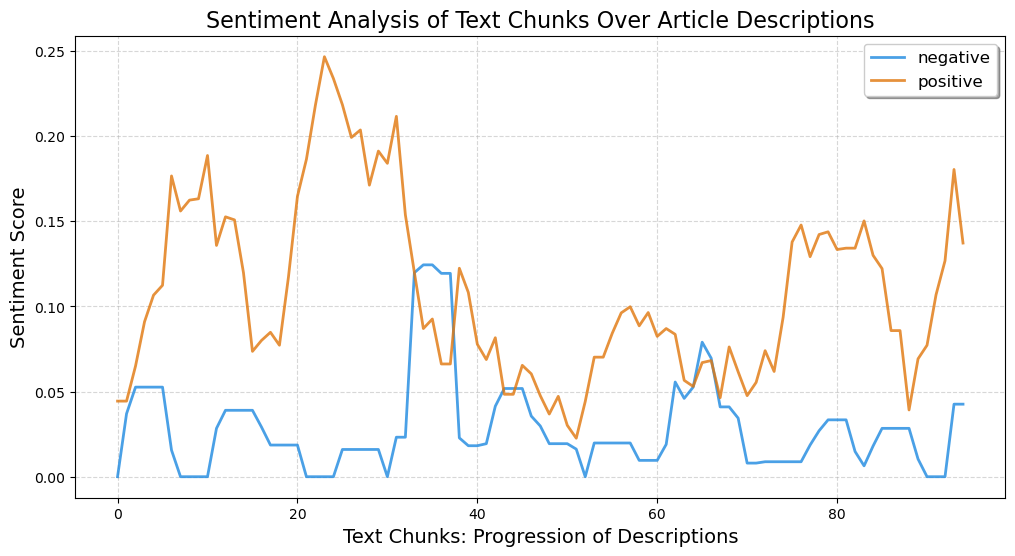

In [129]:
import matplotlib.pyplot as plt

# Plot the results with improved aesthetics
plt.figure(figsize=(12, 6))  # Larger figure size for better visibility
plt.plot(negative_moving_avg, label='negative', color='#1d89e0', linewidth=2, alpha=0.8)
plt.plot(positive_moving_avg, label='positive', color='#e0760b', linewidth=2, alpha=0.8)
plt.xlabel('Text Chunks: Progression of Descriptions', fontsize=14)  # Larger font size for axes labels
plt.ylabel('Sentiment Score', fontsize=14)  # Larger font size for axes labels
plt.title('Sentiment Analysis of Text Chunks Over Article Descriptions', fontsize=16)  # Adding a title
plt.legend(loc='best', fontsize=12, frameon=True, shadow=True)  # Improved legend with frame and shadow
plt.grid(True, linestyle='--', alpha=0.5)  # Adding a grid for readability
plt.show()


This is the output based on the sentiment analysis. The graph shows that positive sentiments are generally stronger in the articles compared to negative sentiments. This suggests that the articles convey a predominantly positive message.

## Re-format output

In [130]:
def reformat_results(results):

    #CLEAN-UP RESULTS 
    keep=[]
    for i in range(0,len(results)):
        # print("=====================================")
        # print(results[i])
        # print(len(list(results[i])))
        for j in range(0,len(list(results[i]))):
            # print(results)
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        #print(len(results[i][j][k][0]),results[i][j][k][0])
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
                        # keep.append()
            if(j==1):
                supp=results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

## Utility function: Convert to NetworkX object

In [131]:
def convert_to_network(df):
    print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G


## Utility function: Plot NetworkX object

In [132]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='EV Articles')
    plt.show()

## Train ARM model

In [133]:
print("Transactions:",pd.DataFrame(transactions))
results = list(apriori(transactions, min_support=0.1, min_confidence=0.0, min_lift=0, min_length=1))     #RUN APRIORI ALGORITHM
pd_results=reformat_results(results)
print("Results\n",pd_results)
G=convert_to_network(pd_results.head(200))

Transactions:                0                1          2         3          4         5   \
0           ahead  sixthgeneration      honda      crvs  malaysian    launch   
1         preview             post       2024     honda         cr        bn   
2           frank         recently   reported  electric    vehicle        ev   
3            firm            owned       4270     share   electric   vehicle   
4         startup          usedcar    segment  focusing  techbased  solution   
..            ...              ...        ...       ...        ...       ...   
94  institutional         investor     bought      2805      share       com   
95            get            recap     recent    health   economic   science   
96            era           moving   molecule    energy     coming       end   
97         moving         electron  efficient     lower     impact      None   
98       electric          vehicle     proved       far         le  reliable   

               6         

## Visualize the results

# ARM NetworkX Object Results

In [134]:
pd_results.head()

,rhs,lhs,supp,conf,supp x conf,lift
0,[13f],[according],0.10101,1.000000,0.101010,4.304348
1,[according],[13f],0.10101,0.434783,0.043917,4.304348
2,[13f],[filing],0.10101,1.000000,0.101010,5.823529
3,[filing],[13f],0.10101,0.588235,0.059418,5.823529
4,[13f],[free],0.10101,1.000000,0.101010,3.807692


/var/folders/w3/pq9m5d810bz24_jz2zl3s6pr0000gn/T/ipykernel_38726/1072609468.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Blues')


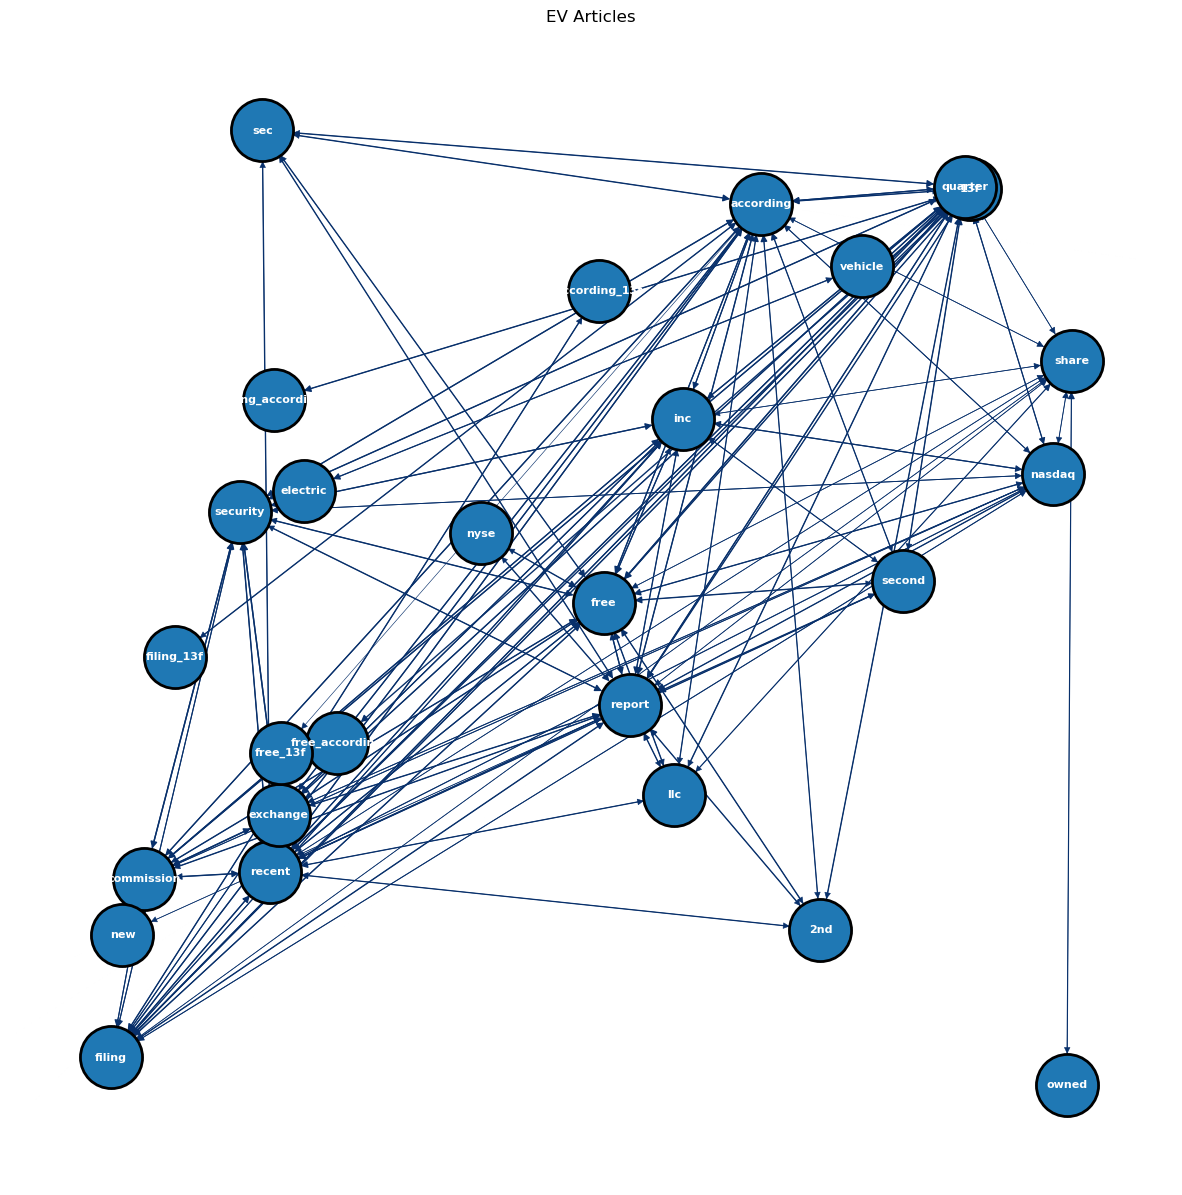

In [135]:
plot_network(G)

The network graph of the ARM analysis shows the relationship between the different words that exist in the articles. It can be observed here that some words like "report", "sec" and "share" have more nodes pointing towards it. This means that these words are more significant in buolding the overall context than the rest. We can also observe nodes that represent financial institutions such as "nyse" (New York Stock Exchange), "sec" (Securities and Exchange Commission) and "nasdaq". This suggests that the article contained information regarding the financial angles of EVs. As mentioned earlier, ARM analysis allows access to uncover potential relationships that weren't considered before. Over here there is a relationship between the words "share" and "owned" and a link to "nyse". This may suggest a context based on the ownership of EV stocks rather than the actual vehicles.

# Conclusions

In conclusion, it can be confidently stated that ARM is highly beneficial for identifying patterns among key variables within large datasets. Manually sifting through articles would require considerable time and effort to uncover insights like the prominence of financial discussions surrounding EVs, particularly stock ownership. The analysis indicates that the general public's interest extends beyond the vehicles themselves to include financial investment in the sector.

# Resources

- https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/ARM/notes.html <br>
- https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/labs/assignments/lab-6.1-ARM-bonus/lab-6.1.html <br>